In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Diagnostic plots

In [2]:
log = pd.read_csv('logg.csv', sep=',')

### Accept + move type statistics

In [4]:
log['accept'].value_counts()

0.0    1742091
1.0     178386
Name: accept, dtype: int64

In [5]:
log['type'].value_counts()

M    666900
D    666613
B    666487
Name: type, dtype: int64

In [6]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       610642
        D       598678
        B       532771
1.0     B        68090
        D        67935
        M        42361
Name: type, dtype: int64

### Convergence

In [11]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [12]:
block_length = 10000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)

In [13]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

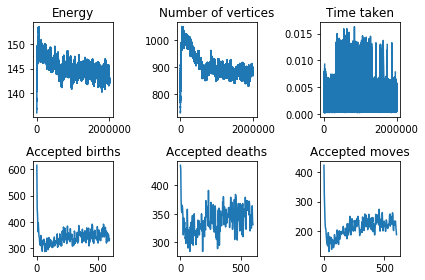

In [14]:

plt.subplot(2,3,1)
plt.title('Energy')
log['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
log['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
log['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
# plt.show()

plt.savefig('foo.pdf')

# Cell data distributions

In [5]:
cell_data = pd.read_csv('cell_data.txt', sep=';')

In [11]:
cell_data

,epsilon,alpha,theta,z,max_weight,tetra_volume,tetra_circum,face_surf,edge_length,point_weight,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.01,0.1,1,500,0.01,"[0.000286249, 0.000230951, 0.000348695, 0.0002...","[0.0937289, 0.0936177, 0.0934784, 0.0844761, 0...","[0.00814071, 0.00872971, 0.00872971, 0.0106917...","[0.111111, 0.157135, 0.111111, 0.111111, 0.157...","[0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.0...","[15, 18, 14, 16, 16, 15, 18, 17, 12, 16, 14, 1...",3774,556,3,0.036226,0.001415,0.065092,1.86386,4.5172913.9218,NaN
